# Agglomerative Hierarchical Clustering Algorithms

### Project objectives

To cluster an automobile data using as many hierarchical clustering algorithms as possible

### Examples of hierarchical clustering algorithms:

- [Automated species identification](https://en.m.wikipedia.org/wiki/Automated_species_identification)
- [Numerical taxonomy](https://en.m.wikipedia.org/wiki/Numerical_taxonomy])
- [Dendrogram](https://en.m.wikipedia.org/wiki/Dendrogram)
- [Cladogram](https://en.m.wikipedia.org/wiki/Cladogram)

### Visualize the results using dendrograms.

### Data structure:
- Rows are features
- Columns are feature characteristics

### Data source is [here](https://drive.google.com/file/d/1i9QwMZ63qYVlxxde1kB9PufeST4xByVQ/view).
#### [GitHub repo](https://github.com/ybezginova2016/UL_01_HierarchicalClustering)


In [718]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from itertools import cycle
from scipy.cluster.hierarchy import dendrogram, to_tree
from sklearn.cluster import AgglomerativeClustering # Agglomerative Hierarchical Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

In [576]:
bool([])

False

In [577]:
bool('False')

True

In [578]:
bool(False)

False

In [579]:
bool("" and True)

False

In [580]:
some_list = [7, 5, 'a', 'Yulia', 0]

In [581]:
result = some_list[::-1]
result

[0, 'Yulia', 'a', 5, 7]

In [582]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/data.csv')
data.head()

/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_16521/4120630558.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/data.csv')


,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c53,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at
0,1,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-699300431.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1 Eploratory Data Analysis

In [583]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15403 non-null  int64  
 1   class       15403 non-null  int64  
 2   c1          15403 non-null  int64  
 3   c2          15403 non-null  int64  
 4   c3          15403 non-null  int64  
 5   c4          15403 non-null  object 
 6   c5          15401 non-null  object 
 7   c6          15401 non-null  float64
 8   c7          41 non-null     object 
 9   c8          15401 non-null  float64
 10  c9          15403 non-null  int64  
 11  c10         0 non-null      float64
 12  c11         0 non-null      float64
 13  c12         768 non-null    object 
 14  c13         0 non-null      float64
 15  c14         15401 non-null  object 
 16  c15         7683 non-null   object 
 17  c16         0 non-null      float64
 18  c17         15401 non-null  object 
 19  c18         15401 non-nul

### 1.1 Working with missings values

[Nice reading how to develop a missings filling strategy](https://loginom.ru/blog/missing)

In [584]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
id,0.000000
class,0.000000
c1,0.000000
c2,0.000000
c3,0.000000
c4,0.000000
c5,0.000000
c6,0.000000
c7,100.000000
c8,0.000000


In [585]:
cols = len(data.axes[1])
cols

64

In [586]:
data_copy = data.copy()

In [587]:
data_copy.describe

<bound method NDFrame.describe of           id      class          c1          c2          c3      c4  \
0          1  545988074           0           0           0  правое   
1          2  545988074           0           0           0  правое   
2          3  647859449  1014559500       33652 -1898910370   левое   
3          4  647859449  1017330063       33655  -645229505   левое   
4          5  647859449  1482170768  1017353208  -826554069   левое   
...      ...        ...         ...         ...         ...     ...   
15398  15399  545988074    67530697     1040736           0   левое   
15399  15400  545988074  1387651697     1040736           0   левое   
15400  15401  545988074    67530697     1040736           0   левое   
15401  15402  545988074  1387651697     1040736           0   левое   
15402  15403  545988074    67530697     1040736           0   левое   

                     c5     c6   c7           c8  ...  c53         c54  c55  \
0                   NaN    NaN  Na

In [588]:
# copying the original data to keep it safe
print(data_copy.isnull().sum())

id                0
class             0
c1                0
c2                0
c3                0
              ...  
c58            7723
c59            7723
c60            7723
created_at    15403
updated_at    15403
Length: 64, dtype: int64


Checking which colunms contain missings and, if the share of missing values is 100%, we drop the column.

In [589]:
# https://www.moonbooks.org/Articles/How-to-filter-missing-data-NAN-or-NULL-values-in-a-pandas-DataFrame-/
data_copy.columns[data_copy.isnull().any()]

Index(['c5', 'c6', 'c7', 'c8', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16',
       'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c24', 'c25', 'c26', 'c27',
       'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37',
       'c38', 'c39', 'c40', 'c41', 'c42', 'c44', 'c45', 'c46', 'c47', 'c48',
       'c49', 'c50', 'c51', 'c52', 'c53', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'created_at', 'updated_at'],
      dtype='object')

In [590]:
data_copy = data_copy.drop(['c7',
'c10',
'c11',
'c12',
'c13',
'c21',
'c19',
'c16',
'c24',
'c26',
'c28',
'c29',
'c31',
'c33',
'c34',
'c35',
'c36',
'c37',
'c38',
'c39',
'c41',
'c42',
'c44',
'c45',
'c49',
'c50',
'c51',
'c52',
'c53',
'c25', 'c30', 'c15',
'created_at',
'updated_at'], axis=1)

Let's check if there are still some missings left.

In [591]:
pd.DataFrame(round(data_copy.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
id,0.000000
class,0.000000
c1,0.000000
c2,0.000000
c3,0.000000
c4,0.000000
c5,0.000000
c6,0.000000
c8,0.000000
c9,0.000000


Checking the data for dublicates - there are no ones.

In [592]:
data_copy.duplicated().sum()

0

There are severak columns which contain 50% of missing values. This is a high share, and we thus cannot drop those columns. So we have to come up to the filling the missings strategy. **Checking the unique values in each column with 50% share of missings, we conclude that we will the same values the missings.**

- data_copy['c56']

In [593]:
data_copy['c56'].unique()

array([nan, 'К'], dtype=object)

In [594]:
data_copy['c56'] = data_copy['c56'].fillna('К')

In [595]:
data_copy['c56'].unique()

array(['К'], dtype=object)

- data_copy['c57']

In [596]:
data_copy['c57'].unique()

array([nan, 'Э'], dtype=object)

In [597]:
data_copy['c57'] = data_copy['c57'].fillna('Э')

In [598]:
data_copy['c57'].unique()

array(['Э'], dtype=object)

- data_copy['c58']

In [599]:
data_copy['c58'].unique()

array([nan, 'Э'], dtype=object)

In [600]:
data_copy['c58'] = data_copy['c58'].fillna('Э')

In [601]:
data_copy['c58'].unique()

array(['Э'], dtype=object)

- data_copy['c59']

In [602]:
data_copy['c59'].unique()

array([nan, 'л'], dtype=object)

In [603]:
data_copy['c59'] = data_copy['c59'].fillna('л')

In [604]:
data_copy['c59'].unique()

array(['л'], dtype=object)

- data_copy['c60']

In [605]:
data_copy['c60'].unique()

array([nan, '(РЕ)'], dtype=object)

In [606]:
data_copy['c60'] = data_copy['c60'].fillna('(РЕ)')

Checking the missings in the data now.

In [607]:
pd.DataFrame(round(data_copy.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
id,0.000000
class,0.000000
c1,0.000000
c2,0.000000
c3,0.000000
c4,0.000000
c5,0.000000
c6,0.000000
c8,0.000000
c9,0.000000


Understaing the size of the dataset left for further analysis.

In [635]:
rows = len(data_copy.axes[0])
rows

15403

In [636]:
columns = len(data_copy.axes[1])
columns

30

In [637]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15403 non-null  int64  
 1   class   15403 non-null  int64  
 2   c1      15403 non-null  int64  
 3   c2      15403 non-null  int64  
 4   c3      15403 non-null  int64  
 5   c4      15403 non-null  object 
 6   c5      15403 non-null  int64  
 7   c6      15401 non-null  float64
 8   c8      15401 non-null  float64
 9   c9      15403 non-null  int64  
 10  c14     15401 non-null  object 
 11  c17     15401 non-null  object 
 12  c18     15401 non-null  object 
 13  c20     15401 non-null  object 
 14  c22     15401 non-null  float64
 15  c23     15403 non-null  float64
 16  c27     15403 non-null  object 
 17  c32     15400 non-null  float64
 18  c40     15401 non-null  float64
 19  c43     15403 non-null  int64  
 20  c46     15401 non-null  float64
 21  c47     15403 non-null  float64
 22

In [638]:
data_copy.describe()

,id,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c43,c46,c47,c48,c54
count,15403.000000,1.540300e+04,1.540300e+04,1.540300e+04,1.540300e+04,15403.000000,15401.000000,1.540100e+04,1.540300e+04,15401.000000,15403.000000,15400.000000,15401.000000,15403.0,15401.000000,15403.0,15401.000000,1.540300e+04
mean,7702.000000,5.462592e+08,-1.707668e+07,1.434529e+06,-1.861000e+06,65.819256,200.649308,2.230836e+05,1.761597e+06,3.609181,0.268515,1.510779,1.997922,18.0,29.956496,16.0,1.000130,2.851440e+08
std,4446.607433,5.249002e+06,1.246947e+09,2.005542e+07,4.946583e+07,34.387439,49.758186,4.971267e+07,3.834631e+07,19.464181,0.165976,0.557623,0.817024,0.0,0.848178,0.0,0.016116,1.045386e+09
min,1.000000,5.459881e+08,-2.143199e+09,0.000000e+00,-1.898910e+09,0.000000,50.000000,-6.993004e+08,0.000000e+00,1.000000,0.080000,1.000000,1.000000,18.0,12.000000,16.0,1.000000,-1.339338e+09
25%,3851.500000,5.459881e+08,-1.061392e+09,1.040736e+06,0.000000e+00,30.000000,150.000000,0.000000e+00,0.000000e+00,2.000000,0.170000,1.000000,1.000000,18.0,30.000000,16.0,1.000000,-4.407518e+08
50%,7702.000000,5.459881e+08,-9.869584e+06,1.040736e+06,0.000000e+00,50.000000,200.000000,0.000000e+00,0.000000e+00,3.000000,0.250000,2.000000,2.000000,18.0,30.000000,16.0,1.000000,0.000000e+00
75%,11552.500000,5.459881e+08,1.063638e+09,1.040736e+06,0.000000e+00,100.000000,250.000000,0.000000e+00,0.000000e+00,4.000000,0.330000,2.000000,3.000000,18.0,30.000000,16.0,1.000000,1.386543e+09
max,15403.000000,6.478594e+08,2.142976e+09,1.017353e+09,6.346628e+08,100.000000,2000.000000,1.756160e+09,1.204267e+09,1026.000000,1.350000,8.000000,4.000000,18.0,30.000000,16.0,3.000000,1.639198e+09


### 1.2 Checking the data for multicollinearity

In [639]:
data_copy.corr()

/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_16521/664035824.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_copy.corr()


,id,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c43,c46,c47,c48,c54
id,1.000000,-0.089219,0.003910,-0.033939,0.065032,0.043466,-0.024560,-0.007773,-0.079375,0.019777,-0.806909,0.224134,0.941616,NaN,0.088601,NaN,-0.013895,0.006666
class,-0.089219,1.000000,0.010354,0.380217,-0.728261,-0.096907,0.252583,0.086860,0.889260,0.605798,0.109559,0.378815,-0.049225,NaN,-0.992788,NaN,0.155971,-0.014092
c1,0.003910,0.010354,1.000000,0.009030,-0.027019,0.040189,0.002524,-0.009131,0.016318,-0.025959,-0.001646,-0.016737,0.013628,NaN,-0.008010,NaN,-0.010206,0.019193
c2,-0.033939,0.380217,0.009030,1.000000,-0.327353,-0.037590,0.197674,0.379173,0.617572,0.040160,0.016194,0.122833,-0.024022,NaN,-0.338486,NaN,-0.000563,-0.005356
c3,0.065032,-0.728261,-0.027019,-0.327353,1.000000,0.068101,-0.150932,0.021683,-0.842796,-0.043606,-0.085878,-0.180167,0.040741,NaN,0.723071,NaN,-0.104805,0.010263
c5,0.043466,-0.096907,0.040189,-0.037590,0.068101,1.000000,-0.025294,-0.006637,-0.084810,-0.059896,-0.011312,-0.037111,0.004745,NaN,0.096045,NaN,-0.015429,0.022190
c6,-0.024560,0.252583,0.002524,0.197674,-0.150932,-0.025294,1.000000,-0.086090,0.204273,0.083709,0.029637,0.115192,-0.012186,NaN,-0.231353,NaN,0.007992,-0.003560
c8,-0.007773,0.086860,-0.009131,0.379173,0.021683,-0.006637,-0.086090,1.000000,0.352484,0.296276,0.033827,-0.067019,-0.007692,NaN,-0.117343,NaN,-0.113394,-0.001224
c9,-0.079375,0.889260,0.016318,0.617572,-0.842796,-0.084810,0.204273,0.352484,1.000000,0.385675,0.100892,0.265567,-0.047823,NaN,-0.882603,NaN,0.091737,-0.012531
c22,0.019777,0.605798,-0.025959,0.040160,-0.043606,-0.059896,0.083709,0.296276,0.385675,1.000000,0.027069,0.351134,0.035902,NaN,-0.645374,NaN,0.210896,-0.008538


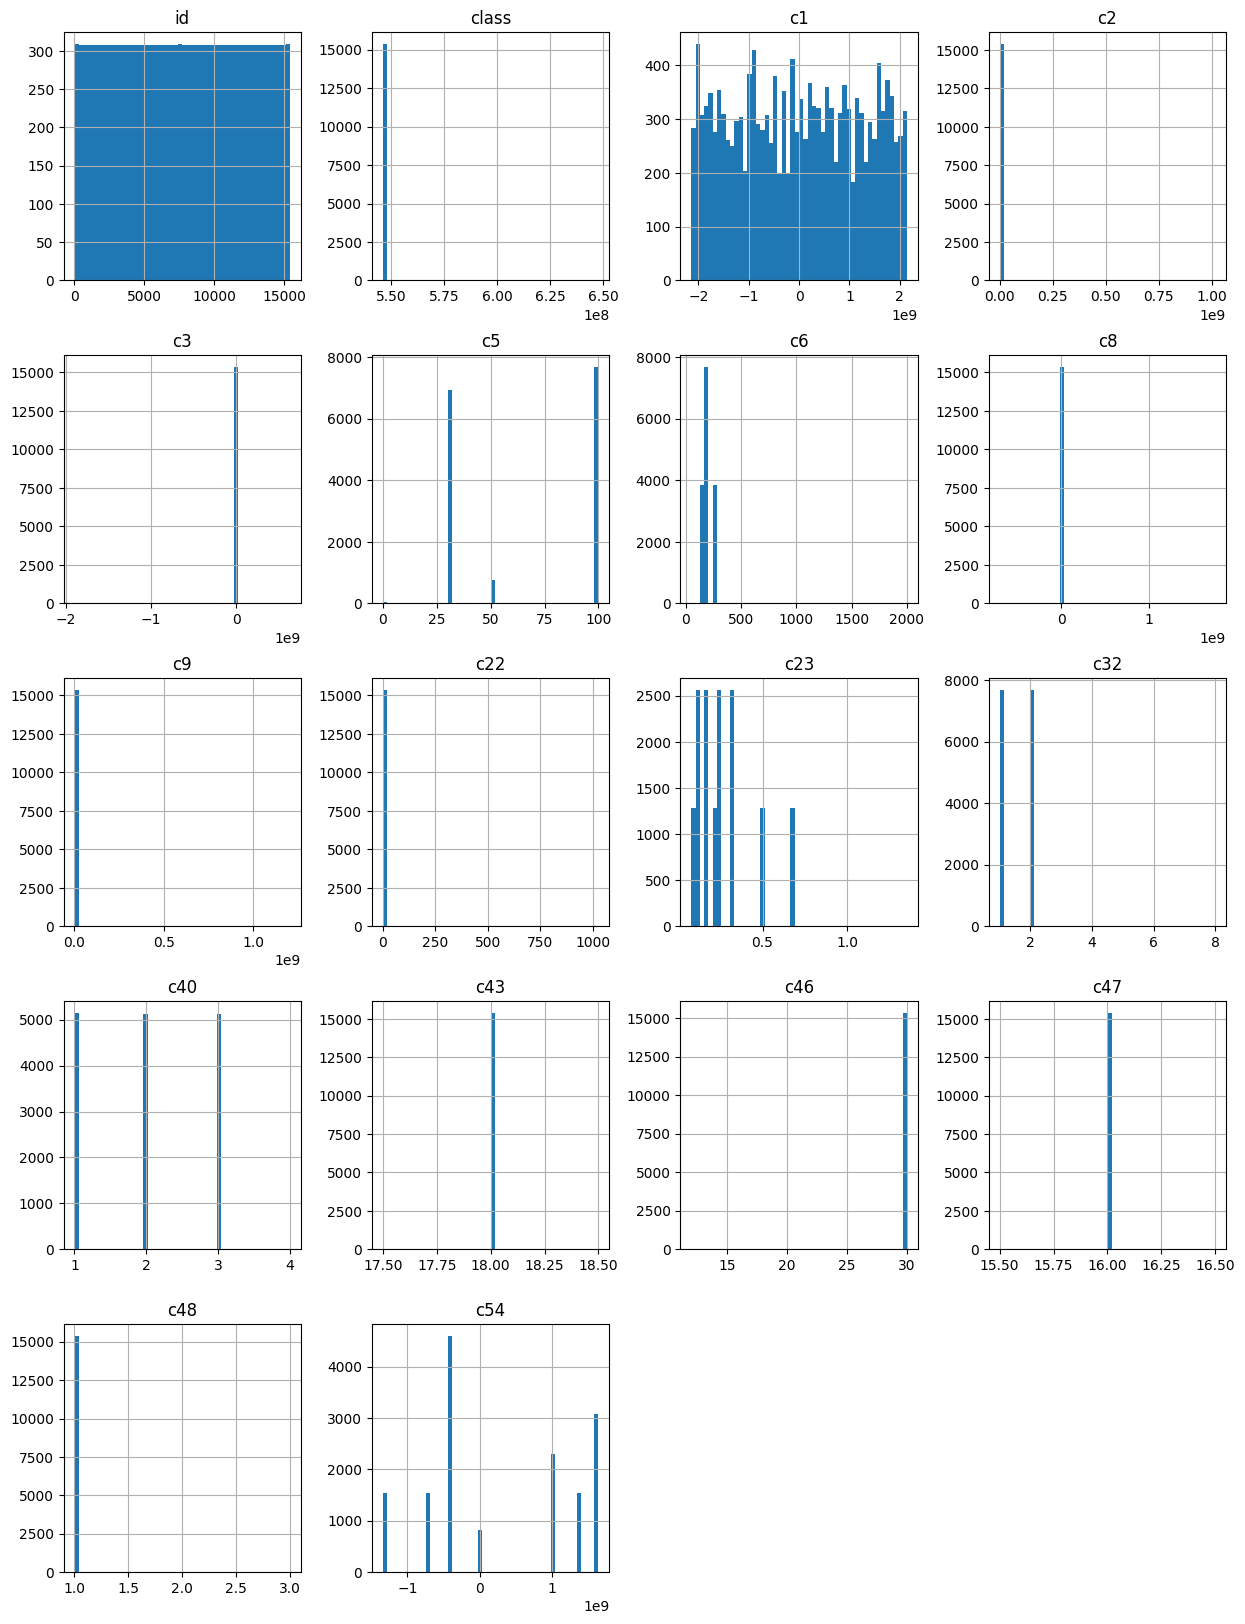

In [640]:
data_copy.hist(bins=50, figsize=(15, 20));
None

### 1.3 Checking for other inaccuracies in the data

In [641]:
data_copy['c43'].unique()

array([18])

In [642]:
data_copy['c43'] = data_copy['c43'].fillna(18)

In [643]:
data_copy['c43'].unique()

array([18])

In [644]:
data_copy['c47'].unique()

array([16.])

In [645]:
data_copy['c47'] = data_copy['c47'].fillna(16.)

In [646]:
data_copy['c47'].unique()

array([16.])

In [647]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15403 non-null  int64  
 1   class   15403 non-null  int64  
 2   c1      15403 non-null  int64  
 3   c2      15403 non-null  int64  
 4   c3      15403 non-null  int64  
 5   c4      15403 non-null  object 
 6   c5      15403 non-null  int64  
 7   c6      15401 non-null  float64
 8   c8      15401 non-null  float64
 9   c9      15403 non-null  int64  
 10  c14     15401 non-null  object 
 11  c17     15401 non-null  object 
 12  c18     15401 non-null  object 
 13  c20     15401 non-null  object 
 14  c22     15401 non-null  float64
 15  c23     15403 non-null  float64
 16  c27     15403 non-null  object 
 17  c32     15400 non-null  float64
 18  c40     15401 non-null  float64
 19  c43     15403 non-null  int64  
 20  c46     15401 non-null  float64
 21  c47     15403 non-null  float64
 22

In [648]:
data_copy.describe;

In [649]:
# look at the rows which contain NaN
data_copy.isna().sum()

id        0
class     0
c1        0
c2        0
c3        0
c4        0
c5        0
c6        2
c8        2
c9        0
c14       2
c17       2
c18       2
c20       2
c22       2
c23       0
c27       0
c32       3
c40       2
c43       0
c46       2
c47       0
c48       2
c54       0
c55      43
c56       0
c57       0
c58       0
c59       0
c60       0
dtype: int64

In [650]:
data_copy['c5'].unique()

array([  0,   9,  30,  50, 100])

In [651]:
data_copy['c5'] = data_copy['c5'].fillna(0)

In [652]:
data_copy['c5'].unique()

array([  0,   9,  30,  50, 100])

In [653]:
data_copy['c5'] = data_copy['c5'].replace(['Не предъявляется'], '0')

In [654]:
data_copy['c5'].unique()

array([  0,   9,  30,  50, 100])

In [655]:
data_copy['c5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15403 entries, 0 to 15402
Series name: c5
Non-Null Count  Dtype
--------------  -----
15403 non-null  int64
dtypes: int64(1)
memory usage: 120.5 KB


In [656]:
data_copy['c5'] = data_copy['c5'].astype('str')

In [657]:
data_copy['c5'] = data_copy['c5'].astype('int')

In [658]:
data_copy['c5'].unique()

array([  0,   9,  30,  50, 100])

In [659]:
data_copy['c5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15403 entries, 0 to 15402
Series name: c5
Non-Null Count  Dtype
--------------  -----
15403 non-null  int64
dtypes: int64(1)
memory usage: 120.5 KB


In [660]:
data_copy['c27'].unique()

array([0, 'Пучковая'], dtype=object)

In [661]:
data_copy['c27'] = data_copy['c27'].fillna(0)

In [662]:
data_copy['c27'].unique()

array([0, 'Пучковая'], dtype=object)

In [663]:
data_copy['c27'] = data_copy['c27'].replace(['Пучковая'], '1')

In [664]:
data_copy['c27'].unique()

array([0, '1'], dtype=object)

In [665]:
data_copy['c27'] = data_copy['c27'].astype('int')

In [666]:
data_copy['c27'].unique()

array([0, 1])

In [667]:
data_copy['c55'].unique()

array([nan, 'В', 'Т', 'Пс', 'П'], dtype=object)

In [668]:
data_copy['c55'] = data_copy['c55'].fillna(0)

In [669]:
data_copy['c55'].unique()

array([0, 'В', 'Т', 'Пс', 'П'], dtype=object)

In [670]:
data_copy['c4'].unique()

array(['правое', 'левое'], dtype=object)

In [671]:
data_copy['c14'].unique()

array([nan, '1.5', '240.0', '2.5', '4.0', '6.0', '10.0', '16.0', '3.0',
       '5.0', '8.0', '25.0', '35.0', '50.0', '70.0', '95.0', '120.0',
       '150.0', '185.0', '300.0', '400.0', '500.0', '1000.0', '0,20',
       '0,35'], dtype=object)

In [672]:
data_copy = data_copy.dropna(subset=['c14', 'c17', 'c18'])

In [673]:
data_copy['c14'] = data_copy['c14'].apply(lambda x: str(x).replace(',', '.'))

In [674]:
data_copy['c14'] = data_copy['c14'].astype('float64')

In [675]:
data_copy['c14'].unique()

array([1.50e+00, 2.40e+02, 2.50e+00, 4.00e+00, 6.00e+00, 1.00e+01,
       1.60e+01, 3.00e+00, 5.00e+00, 8.00e+00, 2.50e+01, 3.50e+01,
       5.00e+01, 7.00e+01, 9.50e+01, 1.20e+02, 1.50e+02, 1.85e+02,
       3.00e+02, 4.00e+02, 5.00e+02, 1.00e+03, 2.00e-01, 3.50e-01])

In [676]:
data_copy['c17'].unique()

array(['12,7', '11,9', '0,0834', '7,6', '4,75', '3,3', '1,9', '1,2',
       '12,12', '7,17', '6,46', '4,64', '3,96', '3,2', '2,45', '1,76',
       '1,88', '1,15', '1,17', '0,707', '0,547', '0,375', '0,264',
       '0,193', '0,15', '0,123', '0,1', '0,0748', '0,0623', '0,0454',
       '0,0349', '0,0685', '0,049', '0,0396', '0,0183', '88,8', '50,7'],
      dtype=object)

In [677]:
data_copy['c17'] = data_copy['c17'].apply(lambda x: str(x).replace(',', '.'))

In [678]:
data_copy['c17'] = data_copy['c17'].astype('float64')

In [679]:
data_copy['c17'].unique()

array([1.270e+01, 1.190e+01, 8.340e-02, 7.600e+00, 4.750e+00, 3.300e+00,
       1.900e+00, 1.200e+00, 1.212e+01, 7.170e+00, 6.460e+00, 4.640e+00,
       3.960e+00, 3.200e+00, 2.450e+00, 1.760e+00, 1.880e+00, 1.150e+00,
       1.170e+00, 7.070e-01, 5.470e-01, 3.750e-01, 2.640e-01, 1.930e-01,
       1.500e-01, 1.230e-01, 1.000e-01, 7.480e-02, 6.230e-02, 4.540e-02,
       3.490e-02, 6.850e-02, 4.900e-02, 3.960e-02, 1.830e-02, 8.880e+01,
       5.070e+01])

In [680]:
data_copy['c18'].unique()

array(['14,6', '13,68', '0,0959', '8,74', '5,46', '3,8', '2,18', '1,38',
       '13,94', '8,25', '7,43', '5,34', '4,55', '3,68', '2,81', '2,02',
       '2,16', '1,32', '1,35', '0,813', '0,629', '0,431', '0,304',
       '0,222', '0,173', '0,141', '0,115', '0,086', '0,0716', '0,0522',
       '0,0401', '0,0788', '0,0564', '0,0455', '0,021', '88,8', '50,7'],
      dtype=object)

In [681]:
data_copy['c18'] = data_copy['c18'].apply(lambda x: str(x).replace(',', '.'))

In [682]:
data_copy['c18'] = data_copy['c18'].astype('float64')

In [683]:
data_copy['c18'].unique()

array([1.460e+01, 1.368e+01, 9.590e-02, 8.740e+00, 5.460e+00, 3.800e+00,
       2.180e+00, 1.380e+00, 1.394e+01, 8.250e+00, 7.430e+00, 5.340e+00,
       4.550e+00, 3.680e+00, 2.810e+00, 2.020e+00, 2.160e+00, 1.320e+00,
       1.350e+00, 8.130e-01, 6.290e-01, 4.310e-01, 3.040e-01, 2.220e-01,
       1.730e-01, 1.410e-01, 1.150e-01, 8.600e-02, 7.160e-02, 5.220e-02,
       4.010e-02, 7.880e-02, 5.640e-02, 4.550e-02, 2.100e-02, 8.880e+01,
       5.070e+01])

In [684]:
data_copy['class'].unique()

array([647859449, 545988074])

In [685]:
data_copy.head(50)

,id,class,c1,c2,c3,c4,c5,c6,c8,c9,...,c46,c47,c48,c54,c55,c56,c57,c58,c59,c60
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,9.531769e+08,1175637482,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
3,4,647859449,1017330063,33655,-645229505,левое,0,50.0,-6.993004e+08,438320836,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
4,5,647859449,1482170768,1017353208,-826554069,левое,0,50.0,9.531769e+08,1204266630,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
5,6,647859449,-1568968858,1044374,634662849,правое,0,250.0,1.756160e+09,466949963,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
6,7,647859449,1014560461,33652,-1898910370,левое,9,50.0,9.531769e+08,1175637482,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
7,8,647859449,1014562378,33652,-1898910370,левое,9,50.0,9.531769e+08,1175637482,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
8,9,647859449,1014564300,33652,-1898910370,левое,9,50.0,9.531769e+08,1175637482,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
9,10,647859449,1386575181,33652,-1898910370,левое,9,50.0,9.531769e+08,1175637482,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
10,11,647859449,1386580947,33652,-1898910370,левое,9,50.0,9.531769e+08,1175637482,...,12.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)
11,12,647859449,460563518,33655,-645229505,левое,0,50.0,-6.993004e+08,438320836,...,16.0,16.0,1.0,0,0,К,Э,Э,л,(РЕ)


### 1.4 Feature Labeling

In [686]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15401 entries, 2 to 15402
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15401 non-null  int64  
 1   class   15401 non-null  int64  
 2   c1      15401 non-null  int64  
 3   c2      15401 non-null  int64  
 4   c3      15401 non-null  int64  
 5   c4      15401 non-null  object 
 6   c5      15401 non-null  int64  
 7   c6      15401 non-null  float64
 8   c8      15401 non-null  float64
 9   c9      15401 non-null  int64  
 10  c14     15401 non-null  float64
 11  c17     15401 non-null  float64
 12  c18     15401 non-null  float64
 13  c20     15401 non-null  object 
 14  c22     15401 non-null  float64
 15  c23     15401 non-null  float64
 16  c27     15401 non-null  int64  
 17  c32     15400 non-null  float64
 18  c40     15401 non-null  float64
 19  c43     15401 non-null  int64  
 20  c46     15401 non-null  float64
 21  c47     15401 non-null  float64
 22

- https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
- OHE(), OrdinalEncoding(), LabelEncoder()

```
 5   c4      15403 non-null  object
 10  c14     15401 non-null  object 
 11  c17     15401 non-null  object 
 12  c18     15401 non-null  object 
 13  c20     15401 non-null  object 
 24  c55     15403 non-null  object 
 25  c56     15403 non-null  object 
 26  c57     15403 non-null  object 
 27  c58     15403 non-null  object 
 28  c59     15403 non-null  object 
 29  c60     15403 non-null  object 
 
'c4', 'c14', 'c17', 'c18', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60'
```

In [687]:
data_copy[['c4', 'c14', 'c17', 'c18', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60']].head(50)

,c4,c14,c17,c18,c20,c55,c56,c57,c58,c59,c60
2,левое,1.5,12.7000,14.6000,МТ,0,К,Э,Э,л,(РЕ)
3,левое,1.5,11.9000,13.6800,ММ,0,К,Э,Э,л,(РЕ)
4,левое,1.5,12.7000,14.6000,МТ,0,К,Э,Э,л,(РЕ)
5,правое,240.0,0.0834,0.0959,ММ,0,К,Э,Э,л,(РЕ)
6,левое,2.5,7.6000,8.7400,МТ,0,К,Э,Э,л,(РЕ)
7,левое,4.0,4.7500,5.4600,МТ,0,К,Э,Э,л,(РЕ)
8,левое,6.0,3.3000,3.8000,МТ,0,К,Э,Э,л,(РЕ)
9,левое,10.0,1.9000,2.1800,МТ,0,К,Э,Э,л,(РЕ)
10,левое,16.0,1.2000,1.3800,МТ,0,К,Э,Э,л,(РЕ)
11,левое,1.5,12.1200,13.9400,ММ,0,К,Э,Э,л,(РЕ)


In [688]:
data_copy[['c4', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60']] = data_copy[['c4', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60']].astype('str')

In [689]:
# define ordinal encoding
ordinalencoder = OrdinalEncoder()

# transform data
result = ordinalencoder.fit_transform(data_copy[['c4', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60']])
result = pd.DataFrame(result, columns = ['c4', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60'])
print(type(result))
print(result)

<class 'pandas.core.frame.DataFrame'>
        c4  c20  c55  c56  c57  c58  c59  c60
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...
15396  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0
15397  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0
15398  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0
15399  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0
15400  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0

[15401 rows x 8 columns]


In [690]:
data_copy.columns

Index(['id', 'class', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c8', 'c9', 'c14',
       'c17', 'c18', 'c20', 'c22', 'c23', 'c27', 'c32', 'c40', 'c43', 'c46',
       'c47', 'c48', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60'],
      dtype='object')

In [691]:
data_copy[['c4', 'c14', 'c17', 'c18', 'c20', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60']].head(50)

,c4,c14,c17,c18,c20,c55,c56,c57,c58,c59,c60
2,левое,1.5,12.7000,14.6000,МТ,0,К,Э,Э,л,(РЕ)
3,левое,1.5,11.9000,13.6800,ММ,0,К,Э,Э,л,(РЕ)
4,левое,1.5,12.7000,14.6000,МТ,0,К,Э,Э,л,(РЕ)
5,правое,240.0,0.0834,0.0959,ММ,0,К,Э,Э,л,(РЕ)
6,левое,2.5,7.6000,8.7400,МТ,0,К,Э,Э,л,(РЕ)
7,левое,4.0,4.7500,5.4600,МТ,0,К,Э,Э,л,(РЕ)
8,левое,6.0,3.3000,3.8000,МТ,0,К,Э,Э,л,(РЕ)
9,левое,10.0,1.9000,2.1800,МТ,0,К,Э,Э,л,(РЕ)
10,левое,16.0,1.2000,1.3800,МТ,0,К,Э,Э,л,(РЕ)
11,левое,1.5,12.1200,13.9400,ММ,0,К,Э,Э,л,(РЕ)


In [692]:
data_final = data_copy[['id', 'class', 'c1', 'c2', 'c3', 'c5', 'c6', 'c8', 'c9', 'c22', 'c23', 'c27', 'c32', 'c40', 'c43', 'c46',
       'c47', 'c48', 'c54']].copy()

In [695]:
data_final.head()

,id,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c27,c32,c40,c43,c46,c47,c48,c54
2,3,647859449,1014559500,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,0.52,0,1.0,1.0,18,12.0,16.0,1.0,0
3,4,647859449,1017330063,33655,-645229505,0,50.0,-6.993004e+08,438320836,49.0,0.32,0,1.0,1.0,18,12.0,16.0,1.0,0
4,5,647859449,1482170768,1017353208,-826554069,0,50.0,9.531769e+08,1204266630,19.0,0.32,0,1.0,1.0,18,12.0,16.0,1.0,0
5,6,647859449,-1568968858,1044374,634662849,0,250.0,1.756160e+09,466949963,570.0,0.71,0,NaN,1.0,18,12.0,16.0,1.0,0
6,7,647859449,1014560461,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,0.68,0,1.0,1.0,18,12.0,16.0,1.0,0


In [696]:
data_clean = data_final.join(result)

In [697]:
data_clean.head(50)

,id,class,c1,c2,c3,c5,c6,c8,c9,c22,...,c48,c54,c4,c20,c55,c56,c57,c58,c59,c60
2,3,647859449,1014559500,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,647859449,1017330063,33655,-645229505,0,50.0,-6.993004e+08,438320836,49.0,...,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,647859449,1482170768,1017353208,-826554069,0,50.0,9.531769e+08,1204266630,19.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,647859449,-1568968858,1044374,634662849,0,250.0,1.756160e+09,466949963,570.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,647859449,1014560461,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,647859449,1014562378,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,647859449,1014564300,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,647859449,1386575181,33652,-1898910370,9,50.0,9.531769e+08,1175637482,7.0,...,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11,647859449,1386580947,33652,-1898910370,9,50.0,9.531769e+08,1175637482,19.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,12,647859449,460563518,33655,-645229505,0,50.0,-6.993004e+08,438320836,49.0,...,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [698]:
data_clean.isna().sum()

id       0
class    0
c1       0
c2       0
c3       0
c5       0
c6       0
c8       0
c9       0
c22      0
c23      0
c27      0
c32      1
c40      0
c43      0
c46      0
c47      0
c48      0
c54      0
c4       2
c20      2
c55      2
c56      2
c57      2
c58      2
c59      2
c60      2
dtype: int64

In [699]:
data_clean = data_clean.dropna()

In [710]:
data_clean.head()

,id,class,c1,c2,c3,c5,c6,c8,c9,c22,...,c48,c54,c4,c20,c55,c56,c57,c58,c59,c60
2,3,647859449,1014559500,33652,-1898910370,9,50.0,953176870.0,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,647859449,1017330063,33655,-645229505,0,50.0,-699300431.0,438320836,49.0,...,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,647859449,1482170768,1017353208,-826554069,0,50.0,953176870.0,1204266630,19.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,647859449,1014560461,33652,-1898910370,9,50.0,953176870.0,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,647859449,1014562378,33652,-1898910370,9,50.0,953176870.0,1175637482,7.0,...,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [715]:
data_clean.describe()

,id,class,c1,c2,c3,c5,c6,c8,c9,c22,...,c48,c54,c4,c20,c55,c56,c57,c58,c59,c60
count,15398.000000,1.539800e+04,1.539800e+04,1.539800e+04,1.539800e+04,15398.00000,15398.000000,1.539800e+04,1.539800e+04,15398.000000,...,15398.000000,1.539800e+04,15398.000000,15398.000000,15398.000000,15398.0,15398.0,15398.0,15398.0,15398.0
mean,7702.499805,5.462527e+08,-1.707484e+07,1.434792e+06,-1.902821e+06,65.82764,200.646188,1.090759e+05,1.731843e+06,3.572087,...,1.000130,2.851022e+08,0.000325,0.499416,2.294324,0.0,0.0,0.0,0.0,0.0
std,4445.164395,5.185603e+06,1.247035e+09,2.005867e+07,4.920717e+07,34.37854,49.761443,4.766092e+07,3.816884e+07,18.923290,...,0.016118,1.045513e+09,0.018018,0.500016,1.010246,0.0,0.0,0.0,0.0,0.0
min,3.000000,5.459881e+08,-2.143199e+09,3.365200e+04,-1.898910e+09,0.00000,50.000000,-6.993004e+08,0.000000e+00,1.000000,...,1.000000,-1.339338e+09,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,3853.250000,5.459881e+08,-1.061392e+09,1.040736e+06,0.000000e+00,30.00000,150.000000,0.000000e+00,0.000000e+00,2.000000,...,1.000000,-4.407518e+08,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
50%,7702.500000,5.459881e+08,-9.869584e+06,1.040736e+06,0.000000e+00,50.00000,200.000000,0.000000e+00,0.000000e+00,3.000000,...,1.000000,0.000000e+00,0.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.0
75%,11551.750000,5.459881e+08,1.063638e+09,1.040736e+06,0.000000e+00,100.00000,250.000000,0.000000e+00,0.000000e+00,4.000000,...,1.000000,1.386543e+09,0.000000,1.000000,3.000000,0.0,0.0,0.0,0.0,0.0
max,15401.000000,6.478594e+08,2.142976e+09,1.017353e+09,6.346628e+08,100.00000,2000.000000,1.756160e+09,1.204267e+09,1026.000000,...,3.000000,1.639198e+09,1.000000,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0


In [709]:
data_clean.columns

Index(['id', 'class', 'c1', 'c2', 'c3', 'c5', 'c6', 'c8', 'c9', 'c22', 'c23',
       'c27', 'c32', 'c40', 'c43', 'c46', 'c47', 'c48', 'c54', 'c4', 'c20',
       'c55', 'c56', 'c57', 'c58', 'c59', 'c60'],
      dtype='object')

### *Conclusion*: As a result of data preprocessing, 34 columns out of 64 were dropped, since they had 100% of missings values; 5 columns contained 50% of missings, and were filled out by the respective values represented in the other filled 50% of the column.

In [717]:
data_clean.to_csv('/Users/yuliabezginova/PycharmProjects/UL_01_HierarchicalClustering/data_final.csv', index=None)